In [2]:
import pandas as pd
import numpy as np
from scipy import stats

btc_data=pd.read_csv('/content/drive/MyDrive/ds_supriya mogarala/csv_files/btc_with_fgi_4h.csv', parse_dates=['timestamp'])
btc_data =btc_data.sort_values('timestamp').reset_index(drop=True)
btc_data['return']=(btc_data['close']-btc_data['open']) /btc_data['open'] * 100
btc_data['volatility']=(btc_data['high']-btc_data['low']) /btc_data['open'] * 100
btc_data['price_change']=btc_data['close']-btc_data['open']

In [3]:
sentiment_map ={'Extreme Fear':0,'Fear':1,'Neutral':2,'Greed':3,'Extreme Greed':4}
btc_data['sentiment_score'] = btc_data['Fear & Greed Classification'].map(sentiment_map)
btc_data['risk_adjusted_return'] =btc_data['return'] / (btc_data['volatility'] + 0.01)

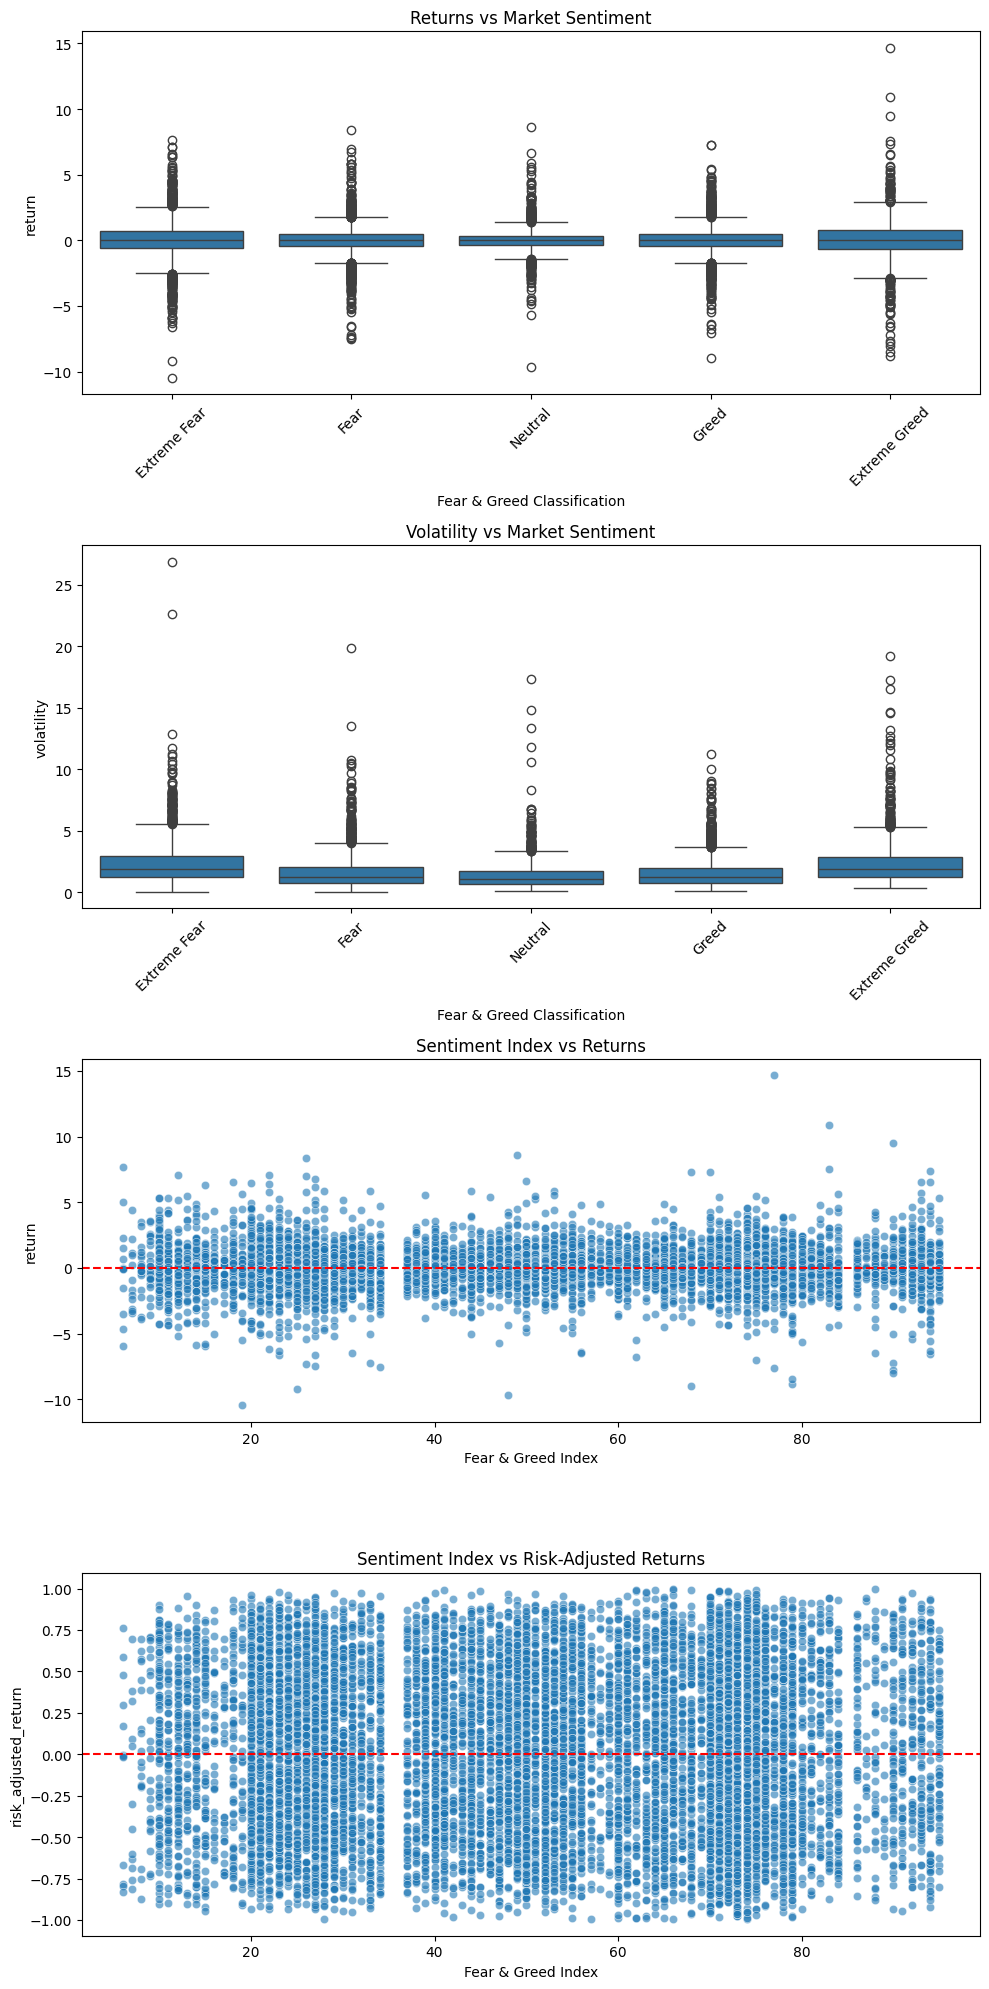

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,20))

plt.subplot(4,1,1)
sns.boxplot(x='Fear & Greed Classification',y='return',data=btc_data,order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'])
plt.title('Returns vs Market Sentiment')
plt.xticks(rotation=45)

plt.subplot(4,1,2)
sns.boxplot(x='Fear & Greed Classification', y='volatility',data=btc_data,order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'])
plt.title('Volatility vs Market Sentiment')
plt.xticks(rotation=45)

plt.subplot(4,1,3)
sns.scatterplot(x='Fear & Greed Index',y='return',data=btc_data,alpha=0.6)
plt.title('Sentiment Index vs Returns')
plt.axhline(0, color='r',linestyle='--')

plt.subplot(4,1,4)
sns.scatterplot(x='Fear & Greed Index', y='risk_adjusted_return',data=btc_data,alpha=0.6)
plt.title('Sentiment Index vs Risk-Adjusted Returns')
plt.axhline(0,color='r',linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
risk_results = btc_data.groupby('Fear & Greed Classification').agg({'risk_adjusted_return': 'mean','return': ['mean', 'std']}).reset_index()

risk_results.columns = ['Sentiment', 'Avg_Risk_Adj_Return', 'Avg_Return', 'Return_Std']
risk_results['Sharpe_Ratio'] = risk_results['Avg_Return'] / risk_results['Return_Std']

print("Risk-Adjusted Performance by Sentiment")
print(risk_results.sort_values('Sharpe_Ratio', ascending=False))

Risk-Adjusted Performance by Sentiment
       Sentiment  Avg_Risk_Adj_Return  Avg_Return  Return_Std  Sharpe_Ratio
3          Greed             0.030063    0.054246    1.070838      0.050658
0   Extreme Fear             0.028195    0.056419    1.607477      0.035098
4        Neutral             0.010670    0.018992    1.018816      0.018641
1  Extreme Greed             0.022756    0.030428    1.653309      0.018404
2           Fear             0.016317   -0.003581    1.182058     -0.003030
